In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
features = df.copy()
features.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
features.drop(columns = ["children","sex"], inplace = True)
features.columns

Index(['age', 'bmi', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:>

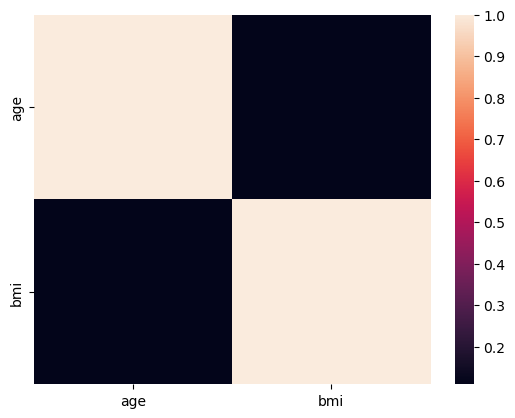

In [8]:
import seaborn as sns

corr = features.select_dtypes("number").drop(columns = ["charges"]).corr()
sns.heatmap(corr)

In [9]:
target = features["charges"]
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
features.drop(columns = ["charges"], inplace = True)

In [11]:
features.head()

,age,bmi,smoker,region
0,19,27.900,yes,southwest
1,18,33.770,no,southeast
2,28,33.000,no,southeast
3,33,22.705,no,northwest
4,32,28.880,no,northwest


In [12]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [14]:
#features['sex']= label_encoder.fit_transform(features['sex'])
features['smoker']= label_encoder.fit_transform(features['smoker'])
features['region']= label_encoder.fit_transform(features['region'])

In [15]:
features.head()

,age,bmi,smoker,region
0,19,27.900,1,3
1,18,33.770,0,2
2,28,33.000,0,2
3,33,22.705,0,1
4,32,28.880,0,1


In [16]:
model.fit(features, target)

LinearRegression()

In [17]:
predictions = model.predict(features)
predictions = pd.Series(predictions)
predictions.head()

0    25545.198759
1     3762.911810
2     6098.131897
3     4315.191050
4     6109.733453
dtype: float64

In [18]:
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error:", mae(target, predictions))

Mean Absolute Error: 4207.8800789204615
